In [1]:
# ML-3 Session Assignment

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/Users/starlord/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# load data
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represent having affairs, 0 represent not

dta['affair'] = (dta.affairs > 0).astype(int)

In [6]:
# data exploration: 

dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [7]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [8]:
# show plots in the notebook
%matplotlib inline

Text(0,0.5,'Frequency')

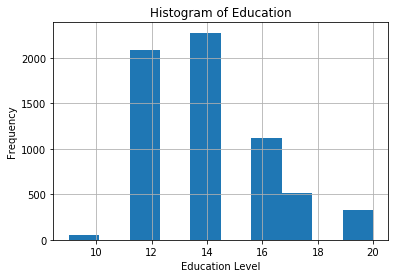

In [9]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

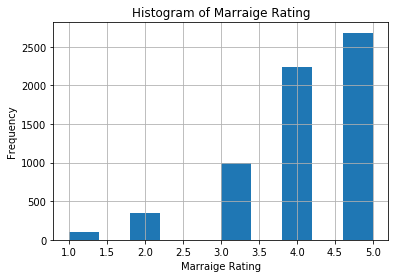

In [10]:
# histogram of marraige rating

dta.rate_marriage.hist()
plt.title('Histogram of Marraige Rating')
plt.xlabel('Marraige Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

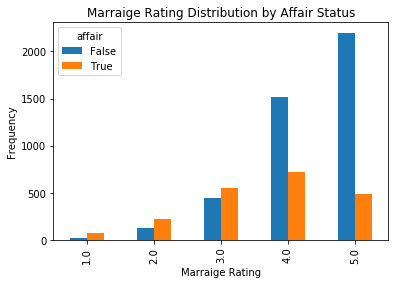

In [11]:
# looking at distribution of marraige rating for those having affaris
# versus those not having affaris (group by trure of False)

pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')

plt.title("Marraige Rating Distribution by Affair Status")
plt.xlabel("Marraige Rating")
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

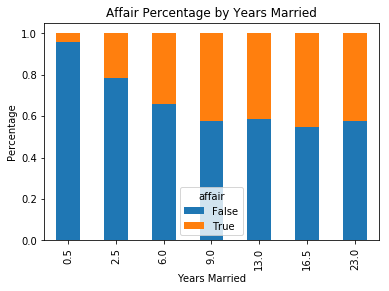

In [12]:
# Percentage of women having affairs by number of years

affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))

affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')


In [13]:
# prepare data for regression

In [14]:
# create dataframes with an intercept column and dummy variable for 
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [15]:
# the column names for the dummy variables to change

In [16]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [17]:
# flatten y into a 1-D array for scikit-learn

y = np.ravel(y)

In [19]:
# logistic regression 

# the model and be fit with x and y

model = LogisticRegression()
model = model.fit(X, y)

In [21]:
# check the accuracy of training set

model.score(X, y)

0.7258875274897895

In [22]:
# 73% accuracy good, lets find the null error rate

In [23]:
# what percentage had affairs?

y.mean()

0.3224945020420987

In [24]:
# 32% of the women had affairs, which means 68% accuracy obtained 

In [27]:
# examine the coeffeicents to see the learning

pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.4898359694670391]
1,occ_2,[0.18806652950575067]
2,occ_3,[0.49894810688842595]
3,occ_4,[0.25066853816223045]
4,occ_5,[0.8390081822806965]
5,occ_6,[0.8339085245923805]
6,occ_husb_2,[0.19063586252336154]
7,occ_husb_3,[0.2978325911195185]
8,occ_husb_4,[0.16140876843141402]
9,occ_husb_5,[0.18777078470476835]


In [30]:
# model validation 
# evaluate the model by splitting into train and test.sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [32]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.35146335, 0.64853665],
       [0.90955085, 0.09044915],
       [0.72567333, 0.27432667],
       ...,
       [0.55727382, 0.44272618],
       [0.81207051, 0.18792949],
       [0.74734605, 0.25265395]])

In [33]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7298429319371728
0.745950606950631


In [34]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [35]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

In [36]:
# predicting the probability of an affair

model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]]))

array([[0.7747224, 0.2252776]])

In [ ]:
# The predicted probability of an affiar is 23%